<a href="https://colab.research.google.com/github/siddharath28/Machine-learning/blob/main/HR%20Analytics%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('people.csv')

In [4]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [6]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

# Aim of Case study: To analyse the reasons for Emplyees leaving the Organazation
#     Also suggest some ideas to HR of the Company so that they can retain their Employees

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#EDA (Exploratorty Data Analysis)

In [9]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

Duplicate Values

In [10]:
df.duplicated().sum()

3008

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [13]:
df.duplicated().sum()

0

#Check for Outliers

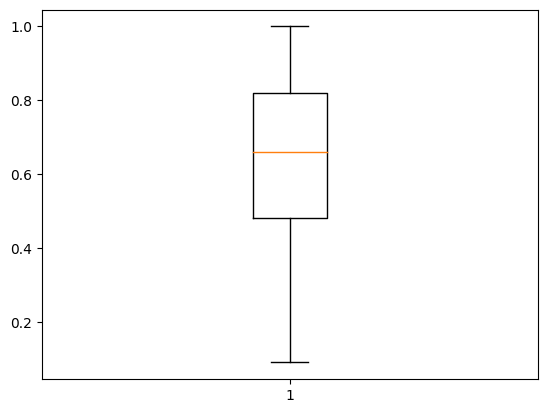

In [14]:
plt.boxplot(df["satisfactoryLevel"])
plt.show()

In [16]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

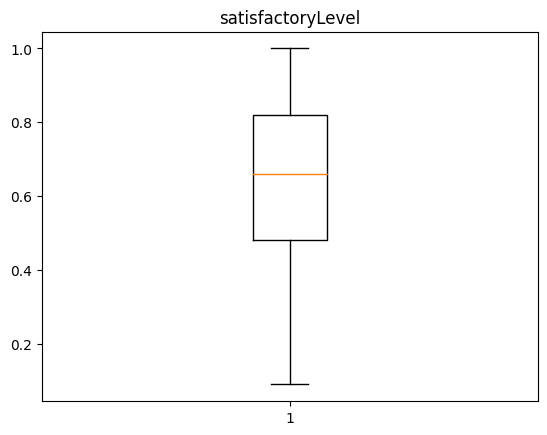

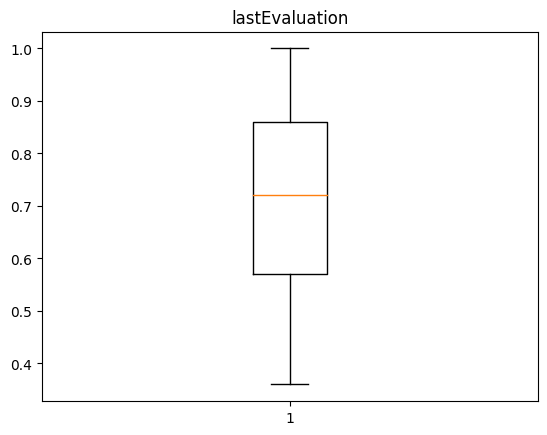

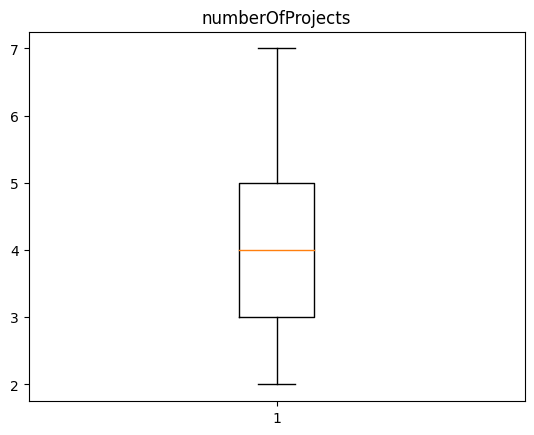

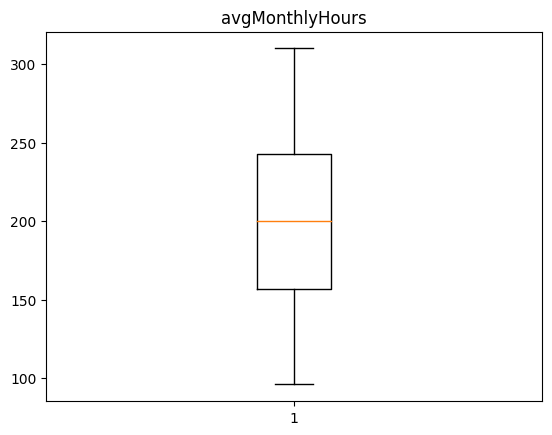

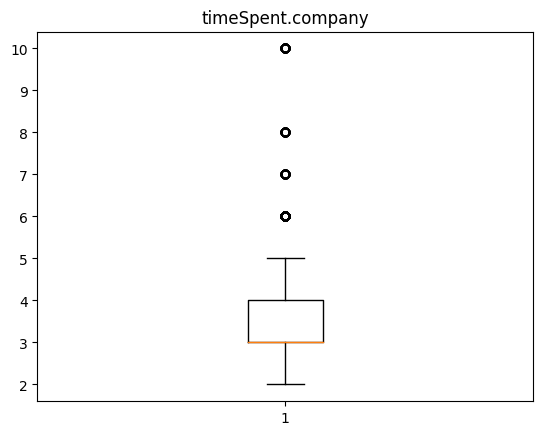

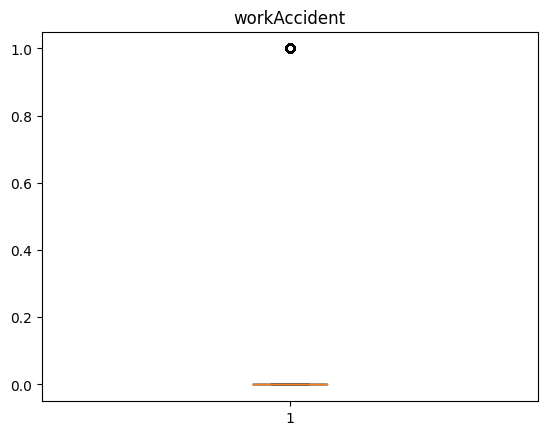

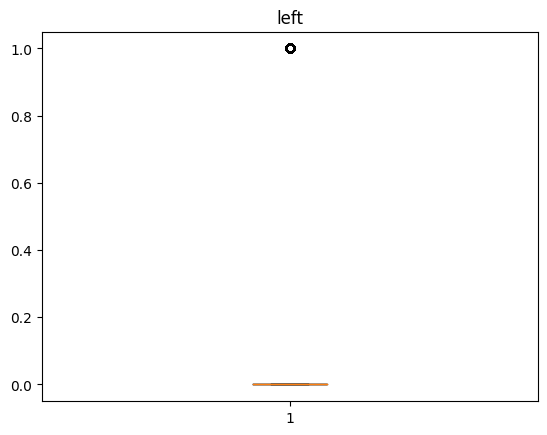

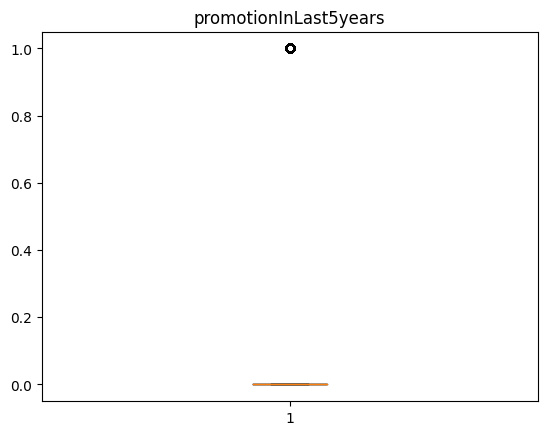

In [17]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

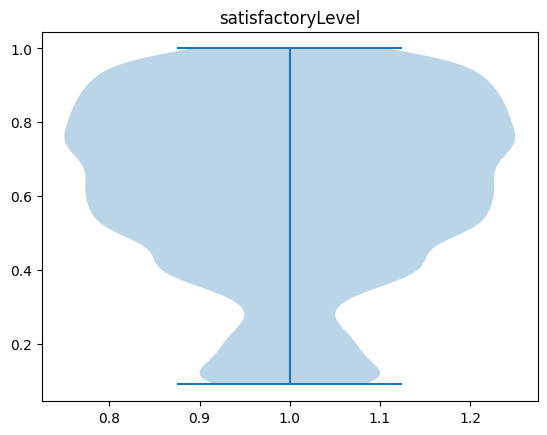

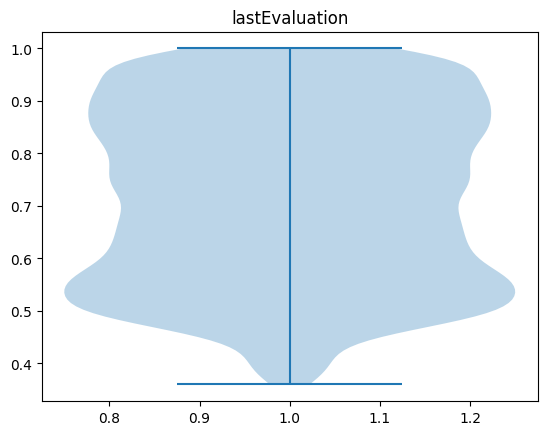

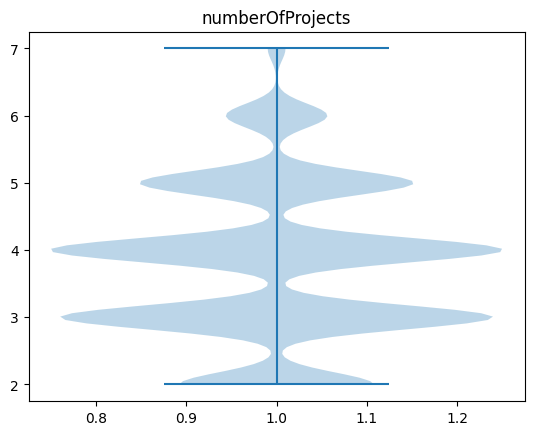

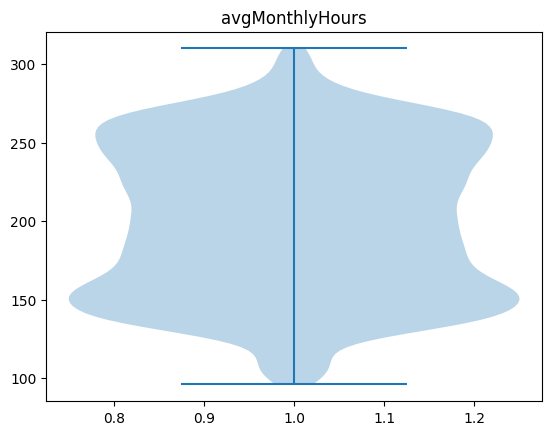

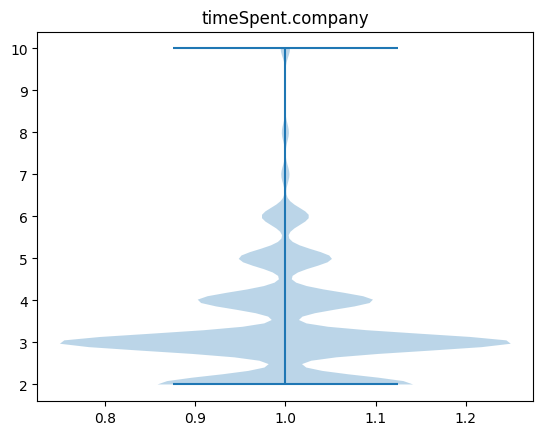

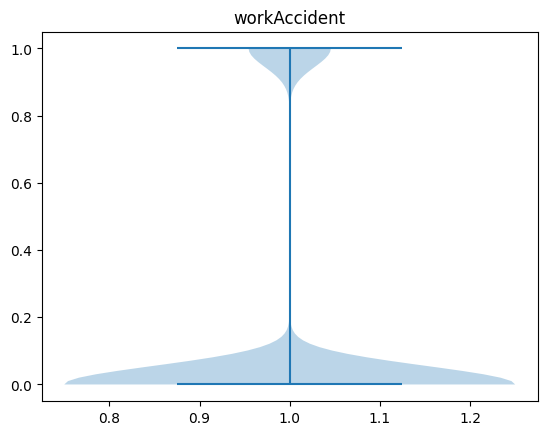

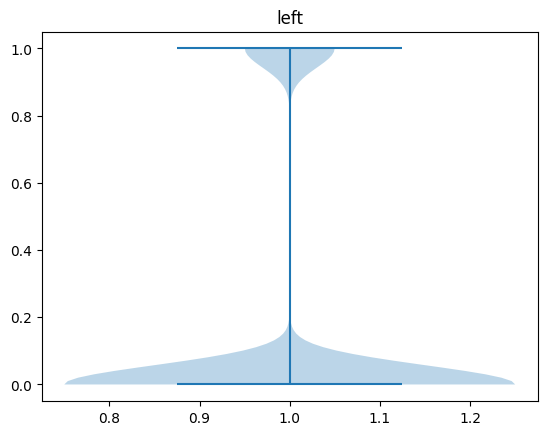

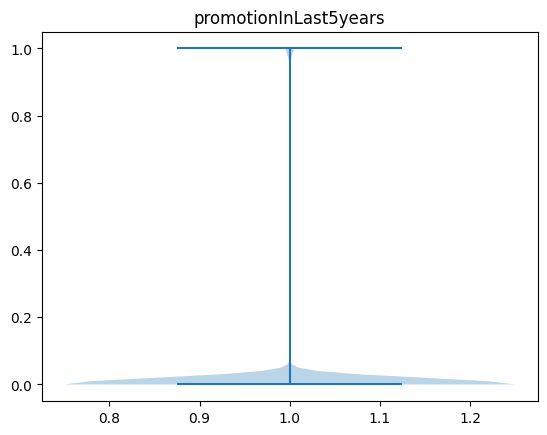

In [18]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.violinplot(df[col])
        plt.title(col)
        plt.show()

# Visual Represnetation

In [19]:
df[["satisfactoryLevel","lastEvaluation","numberOfProjects","avgMonthlyHours","timeSpent.company","workAccident","left","promotionInLast5years"]].corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


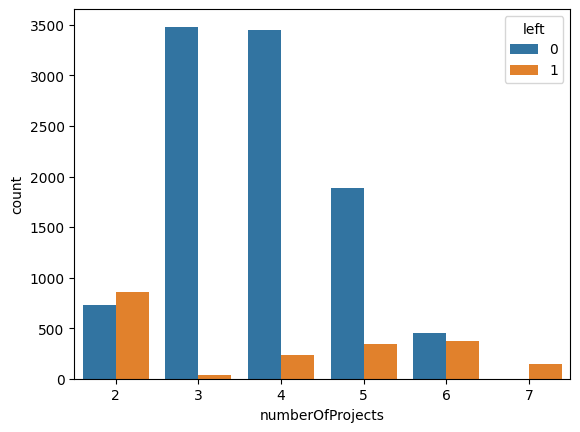

In [20]:
sns.countplot(data = df, x = "numberOfProjects", hue="left")
plt.show()

# inference- people who are assigned 2 projects and 7 projects are leaving
# suggessions-I think projects from 7 projects people should be redistributed to people with 2 projects.
# (Assigning the 3-5)

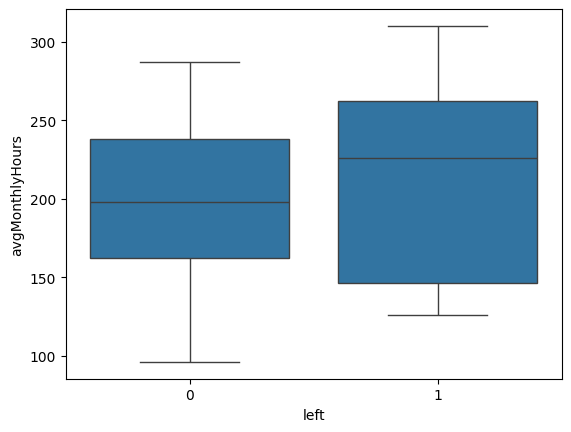

In [22]:
# prompt: plot for avgMonthlyHours

import matplotlib.pyplot as plt
sns.boxplot(x = df["left"], y = df["avgMonthlyHours"])
plt.show()


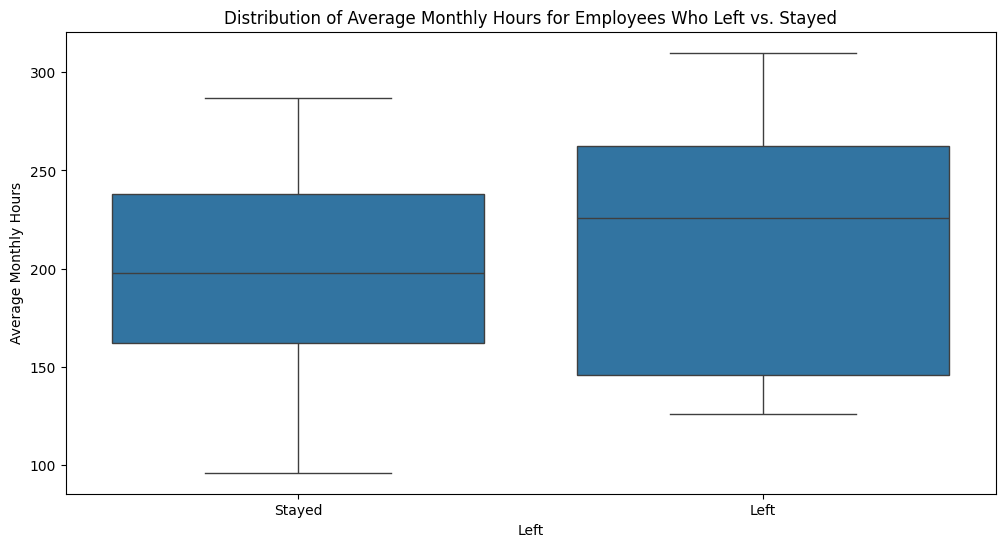

In [24]:


plt.figure(figsize=(12, 6))
sns.boxplot(x='left', y='avgMonthlyHours', data=df)
plt.title('Distribution of Average Monthly Hours for Employees Who Left vs. Stayed')
plt.xlabel('Left')
plt.ylabel('Average Monthly Hours')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()


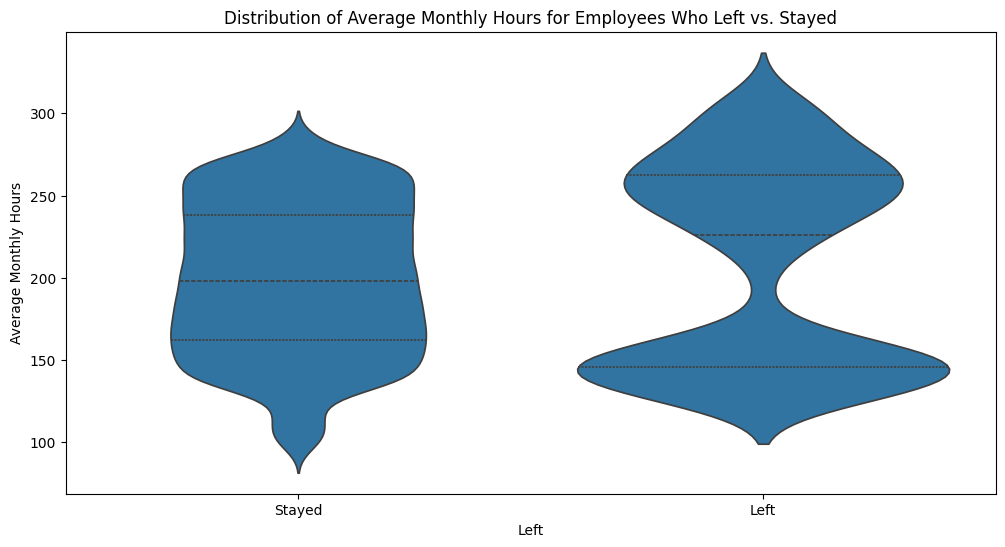

In [25]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='left', y='avgMonthlyHours', data=df, inner="quart")
plt.title('Distribution of Average Monthly Hours for Employees Who Left vs. Stayed')
plt.xlabel('Left')
plt.ylabel('Average Monthly Hours')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()


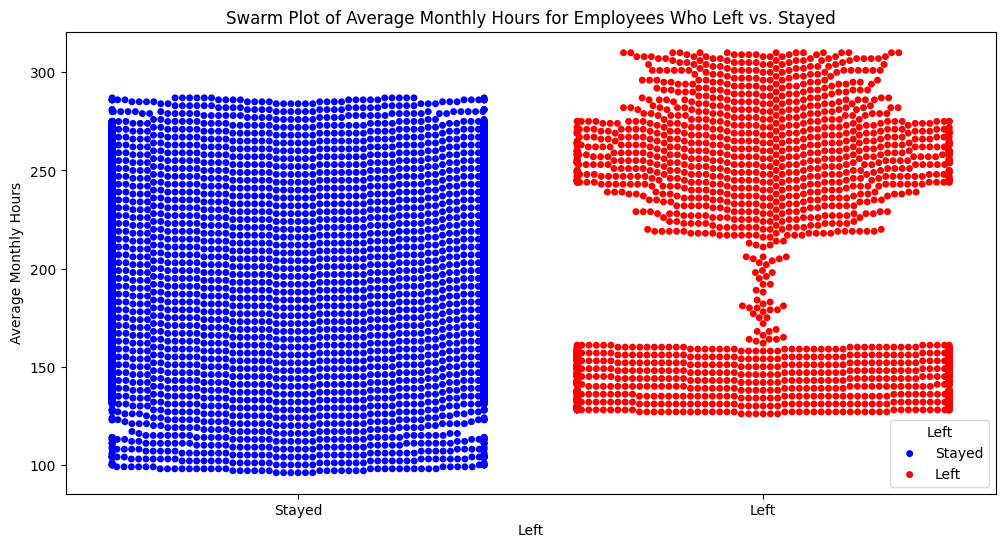

In [26]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='left', y='avgMonthlyHours', data=df, hue='left', palette=['blue', 'red'])
plt.title('Swarm Plot of Average Monthly Hours for Employees Who Left vs. Stayed')
plt.xlabel('Left')
plt.ylabel('Average Monthly Hours')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()


inference- people who has avg hour is less than 120 hours not leaving at all  and who has more than 270  are leaving for sure
suggessions- Try to maintain avg monthly hours around 200 hours.

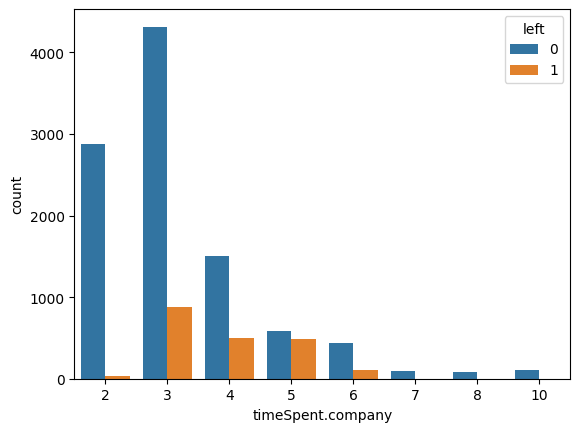

In [27]:
sns.countplot(data=df,x="timeSpent.company",hue="left")
plt.show()

# inference= people leave the organisation after exp of 3 -5 years
# Once they complete 3-5 years, then they should be given supervisory roles for projects with inexperienced ones
#working under them giving the role based incentives or increment

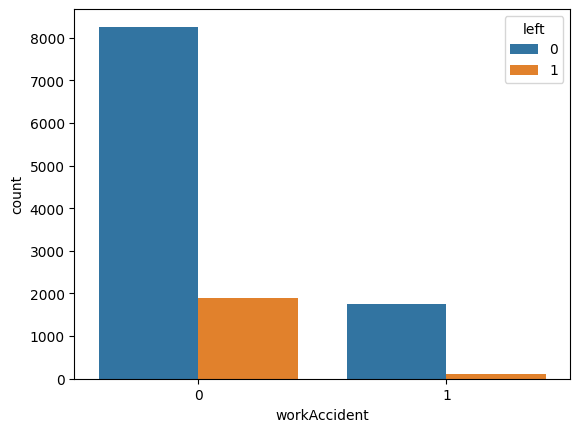

In [28]:
sns.countplot(data=df,x="workAccident",hue="left")
plt.show()

# 0 means employees do not have any work accident

# inference=employees are not leaving just coz of conflicts
# suggession --nill

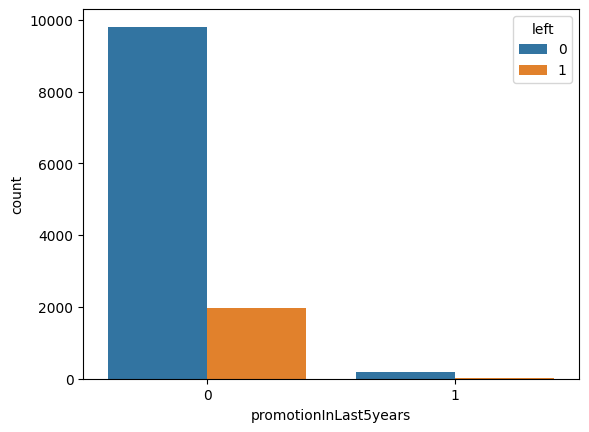

In [29]:
sns.countplot(data=df,x="promotionInLast5years",hue="left")
plt.show()

# inference : people who are not have promotions in last 5 year are leaving
# suggetions:HRs should provide time to time promotions to the employees

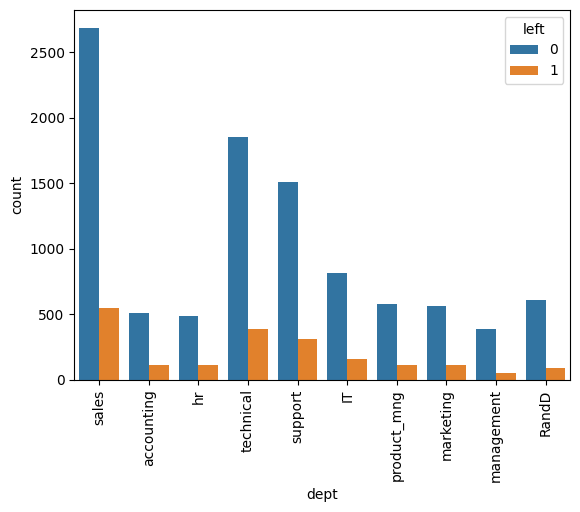

In [30]:
sns.countplot(data=df,x="dept",hue="left")
plt.xticks(rotation=90)
plt.show()

# inference= people of sales, technical, support are leaving the company most
# Suggestions
1. give option to move other dep
2. incentives
3. for better team management team meetings to discuss whatever problem emplyees are facing
4. taking for team outings, lunch, for recreational activity and reduce stress level

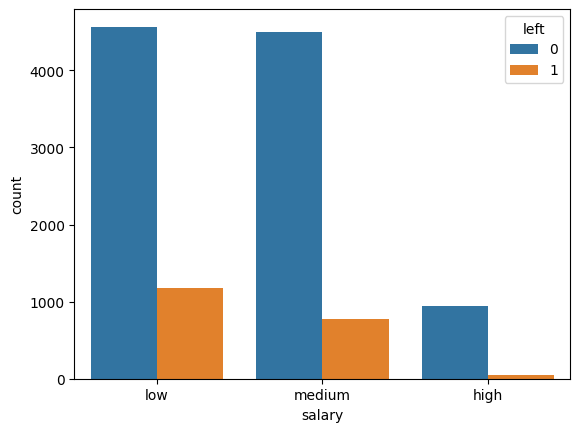

In [31]:
sns.countplot(data=df,x="salary",hue="left")
plt.show()

# inferecences- employees with low/medium salary are leaving most
# suggestions- Regular sal hikes according to the experience
# salary hikes + promotion + incentives + project changes+ perks + work hour managemnts  and benifits